In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/home/shreyas/Desktop/SMSSpamCollection", sep="\t", names= ["label", "text"])
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5572, 2)

In [6]:
import nltk
nltk.download('stopwords')
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/shreyas/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/shreyas/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
sw = stopwords.words("english")
ps = PorterStemmer()

In [9]:
def ct(text):
    tokens = word_tokenize(text)
    clean = [word for word in tokens if word.isdigit() or word.isalpha()]
    clean = [ps.stem(word) for word in clean if word not in sw]
    return clean

In [10]:
ct("hello i am  i am going to me hers papers")

['hello', 'go', 'paper']

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
tfid = TfidfVectorizer(analyzer=ct)

In [13]:
x = df['text']
y = df['label']

In [14]:
x_new = tfid.fit_transform(x)

In [15]:
x_new.shape

(5572, 6513)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, random_state=0, test_size=0.25)

In [18]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [19]:
nb.fit(x_train.toarray(), y_train)

GaussianNB()

In [20]:
y_p = nb.predict(x_test.toarray())

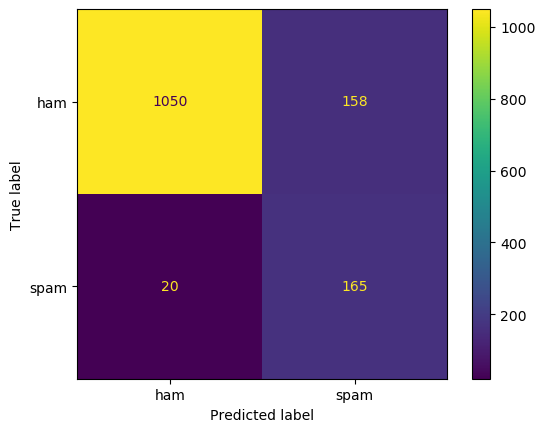

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_p)

In [22]:
from sklearn.metrics import accuracy_score, classification_report

In [23]:
print(classification_report(y_test, y_p))

              precision    recall  f1-score   support

         ham       0.98      0.87      0.92      1208
        spam       0.51      0.89      0.65       185

    accuracy                           0.87      1393
   macro avg       0.75      0.88      0.79      1393
weighted avg       0.92      0.87      0.89      1393



In [24]:
accuracy_score(y_test, y_p)

0.8722182340272793

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
p = {}

In [27]:
p = {
    'var_smoothing': [1e-2, 1e-5, 1e-7, 1e-9]
}

In [28]:
grid = GridSearchCV(nb, param_grid=p, cv = 5, scoring="accuracy")

In [34]:
grid.fit(x_train.toarray(), y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [0.01, 1e-05, 1e-07, 1e-09]},
             scoring='accuracy')

In [35]:
nb = grid.best_estimator_

In [36]:
y_p = nb.predict(x_test.toarray())

In [37]:
accuracy_score(y_test, y_p)

0.9117013639626705